# <center> Générateurs de nombres aléatoires <br> TP1 - Générateurs à Congruence Linéaire (GCL)</center>
<center> 2023/2024 - L. Naert/A. Ridard </center>

## Le générateur à congruence linéaire

In [1]:
import datetime as dt
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

> **Question 1 :**
> Ecrire une fonction `monGCL(a,b,m,s)` qui, à partir d'un état $s$, retourne le nouvel état : $as + b$ [m]


In [2]:
# Réponse
def monGCL(a, b, m, s) :
    return (a*s+b)%m
    
try:
    assert monGCL(3,5,10,2) == 1
    assert monGCL(3,5,10,1) == 8
    assert monGCL(3,5,10,8) == 9
    print("monGCL : OK")
except:
    print("monGCL : ERREUR")


monGCL : OK


> **Question 2 :**
> Faire une fonction `findPeriod(a,b,m,g)` qui retourne la séquence d'états internes $s$ générée par le GCL jusqu'à la première répétition ainsi que la valeur de la période. (g désigne la graine, g=$s_0$)

In [3]:
def findPeriod(a, b, m, g) :
    periodes=[g]
    while True :
        g=(a*g+b)%m
        if g in periodes :
            periodes.append(g)
            periode=len(periodes)-(periodes.index(g)+1)
            return periodes ,periode
        periodes.append(g)
    
try:
    assert findPeriod(3,5,10,2) == ([2, 1, 8, 9, 2], 4)
    assert findPeriod(3,5,10,0) == ([0, 5, 0], 2)
    assert findPeriod(4,4,10,1) == ([1, 8, 6, 8], 2)
    print("findPeriod : OK")
except:
    print("findPeriod : ERREUR")

findPeriod : OK


> **Question 3 :**
- A partir des graines suivantes, générer les entiers avec $a=25$, $b=16$, $m=256$ jusqu'à la première répétition, et préciser la période : <br>
$s_0=125$, $s_0=96$, $s_0=50$ et $s_0=10$
- Expliquer pourquoi ce générateur n'est pas satisfaisant

In [4]:
# s0=125
print("g=125 : ",findPeriod(25,16,256,125))

# g=96
print("g=96 : ",findPeriod(25,16,256,96))

#g=10
print("s0=10 : ",findPeriod(25,16,256,10))

g=125 :  ([125, 69, 205, 21, 29, 229, 109, 181, 189, 133, 13, 85, 93, 37, 173, 245, 253, 197, 77, 149, 157, 101, 237, 53, 61, 5, 141, 213, 221, 165, 45, 117, 125], 32)
g=96 :  ([96, 112, 0, 16, 160, 176, 64, 80, 224, 240, 128, 144, 32, 48, 192, 208, 96], 16)
s0=10 :  ([10, 10], 1)


Réponse : </br>
16 et 256 ne sont pas premiers entre eux, donc le generateur ne peut pas atteindre la perdiode maximale, quelle que soit a ou s0.</br>
De plus, la periode depend de la graine.

> **Question 4 :**
> A partir de la graine $s_0=5$, générer les entiers avec $a=6$, $b=2$, $m=2^{24}$ jusqu'à la première répétition, et préciser la période. Que remarquez-vous ?

In [5]:
print(findPeriod(6,2,2**24,5))

([5, 32, 194, 1166, 6998, 41990, 251942, 1511654, 9069926, 4087910, 7750246, 12947046, 10573414, 13108838, 11544166, 2156134, 12936806, 10511974, 12740198, 9332326, 5662310, 419430, 2516582, 15099494, 6710886, 6710886], 1)


Réponse : </br>
Bien que la premiere repetition n'apparaisse pas tout de suite, la periode est de 1. </br>
Les 2 derniers elements sont les memes. </br>
Ici la periode ne semble pas dependre de la graine, mais comme la periode est 1, ce GCL n'est pas satisfaisant.


> **Question 5 :**
- Ecrire une fonction **monGCL_N**$(a, b, m, g, N)$ qui retourne la liste des $N$ entiers $s_0, s_1, ..., s_{N-1}$ générés à partir de la graine $s_0 = g$ et la relation de récurrence $s_n = f(s_{n-1})$ avec $f(s) = as + b$ [m]
- Tester la fonction pour retrouver, au passage, la séquence de la question 4
- Implémenter une ou plusieurs des possibilités de GCL avec une période maximale du diapo 17 de cours 1. La période est-elle bien maximale ?

In [6]:
# Réponse
def monGCL_N(a,b,m,g,N):
    """
    Cette fonction retourne la liste des N entiers s_0, s_1, ..., s_{N-1} générés
    à partir de la graine s_0 = g et la relation de récurrence s_{k+1} = f(s_k) avec f(s) = as + b mod m 
    """
    fss=[g]
    for i in range(N):
        g=monGCL(a,b,m,g)
        fss.append(g)
    return fss

try: #A remplir pour tester que la solution de la question 4 est la même que celle de la question 5
    assert findPeriod(1,5,16,4)[0]==monGCL_N(1,5,16,4,16)
    print("monGCL_N : OK")
except:
    print("monGCL_N : ERREUR")




monGCL_N : OK


*Remarque : pour initialiser la graine, on pourra utiliser l'horloge de l'ordinateur*

In [7]:
date = str(dt.datetime.now())
s = int(date[-4:])
print(s)

5362


## Le générateur multi-récursif

> **Question 6 :**
- Ecrire une fonction `monGMR_N(a1,a2,a3,m,g,N)` qui retourne la liste des $N$ triplets $\left(s_0^{(1)}, s_0^{(2)}, s_0^{(3)}\right), \left(s_1^{(1)}, s_1^{(2)}, s_1^{(3)}\right), ..., \left(s_{N-1}^{(1)}, s_{N-1}^{(2)}, s_{N-1}^{(3)}\right)$ générés à partir de la graine $\left(s_0^{(1)}, s_0^{(2)}, s_0^{(3)}\right) = g$ et la relation de récurrence $\left(s_n^{(1)}, s_n^{(2)}, s_n^{(3)}\right) = f\Big(\left(s_{n-1}^{(1)}, s_{n-1}^{(2)}, s_{n-1}^{(3)}\right)\Big) = \left(s_{n-1}^{(2)}, s_{n-1}^{(3)}, a_1s_{n-1}^{(1)} + a_2s_{n-1}^{(2)} + a_3s_{n-1}^{(3)} \mod m\right)$
- Ajouter un test pour vérifier que vous obtenez bien les valeurs calculées dans le cas de l'exercice du diapo 21 du cours (question 2).

In [8]:
# Réponse
# g est ici une liste de 3 entiers
def monGMR_N(a1, a2, a3, m, g, N) :
    triplets=[g.copy()]
    for i in range(N-1):
        g2=(g[0]*a1+g[1]*a2+g[2]*a3)%m
        g[0]=g[1]
        g[1]=g[2]
        g[2]=g2
        triplets.append(g.copy())
    return triplets

# Initialisation au hasard
#g = list(npr.randint(1000, size=3))

try: 
    assert monGMR_N(0, 1403580, -810728, 2**32 - 209, [10,5,3], 5) == [[10, 5, 3], 
                                                                [5, 3, 4585716], 
                                                                [3, 4585716, 1677346834], 
                                                                [4585716, 1677346834, 2993617742], 
                                                                [1677346834, 2993617742, 3127246628]]

    assert  monGMR_N(2,0,5,10,[1,0,3],5) == [[1, 0, 3],[0,3,7],[3,7,5],[7,5,1],[5,1,9]]
    print("monGMR_N : OK")
except:
    print("monGMR_N : ERREUR")




monGMR_N : OK


## Le générateur MRG32k3

> **Question 7 :**
> Programmer une fonction `monMRG32k3_N(g,N)` qui retourne la liste des $N$ __réels__ entre 0 et 1 à partir de la graine $g$ (voir diapo 22/23 du cours 1)

In [9]:
# Réponse
# g est ici une liste de 6 élements, 
# les 3 premiers désigne la graine du première GMR et les 3 suivants la graine du deuxième
def monMRG32k3_N(g, N) :
    gmr1=monGMR_N(0,1403580,-810728,2**32-209,g[:3],N)
    gmr2=monGMR_N(527612,0,-1370589,2**32-22853,g[3:],N)
    res=[]
    for i in range(N):
        res.append(((gmr1[i][2]-gmr2[i][2])%(2**32-209))/(2**32-209))
    return res

try: 
    g=[1,2,3,4,5,6]
    assert monMRG32k3_N(g,3) == [0.9999999993015081, 0.001515891942386845, 0.4304798091692571]
    print("monMRG32k3_N : OK")
except:
    print("monMRG32k3_N : ERREUR")
    

monMRG32k3_N : OK


## Qualité d'un générateur de nombres aléatoires


Supposons qu’on génére à l'aide d'un GNA, une suite de nombres réels entre 0 et 1. Il est difficile de comparer une telle suite déterministe (sauf pour le choix de la graine) avec une suite aléatoire. Pour cela, il faut d’abord choisir un critère de qualité, de préférence, simples et pertinents. 

Nous allons tester ici deux critères : 
- la fréquence d'apparition de chaque valeur (test spectral de dimension 1)
- l’indépendance de deux termes consécutifs (test spectral de dimension 2)

> **Question 8 (fréquence d'apparition) :**

Générer les 1001 premiers réels en utilisant : 
- Le GCL de la question 4
- Le générateur MRG32k3 avec une graine aléatoire
- Le générateur npr.rand de Python
  
Observer les fréquences d'apparition de chaque valeur à l'aide de l'histogramme, que remarquez-vous ? 

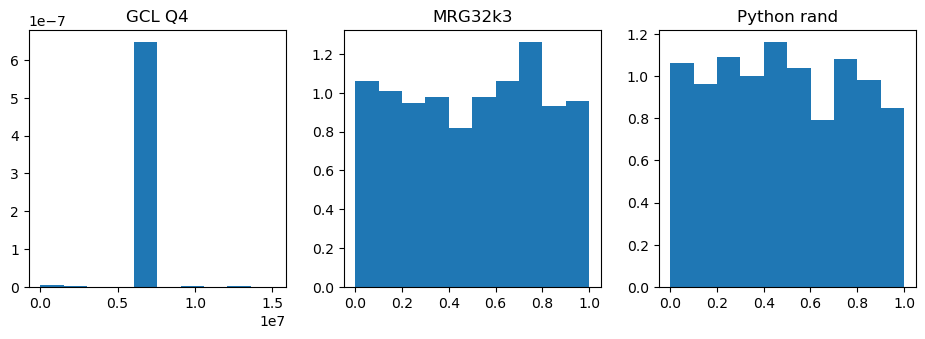

In [10]:
# Réponse
g = list(npr.randint(1000, size=6)) # une graine "aleatoire" de taille 6

x_GCL = monGCL_N(6,2,2**24,5,1001)

x_MRG32k3 = monMRG32k3_N(g,1001)

x_Python = npr.rand(1001)

# Pour mettre les 3 figures côte à côte
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0,1.5,1.5])
ax1.set_title('GCL Q4')
ax1.hist(x_GCL, density=True)
ax1.set_box_aspect(1)

ax2.set_title('MRG32k3')
ax2.hist(x_MRG32k3, density=True)
ax2.set_box_aspect(1)

ax3.set_title('Python rand')
ax3.hist(x_Python, density=True)
ax3.set_box_aspect(1)
plt.show()

reponse : </br>
Le GCL de la question 4 a une tres mauvaise repartiion des valeurs. </br>
La repartition des valeurs de MRG32k3 et de numpy sont similaires, et bien plus uniformes.

> **Question 9 (Indépendance de deux valeurs consécutives) :** Pour cela, on représente graphiquement les points $(x_k, x_{k+1})$ dans le carré $[0, 1]^2$. Un générateur sera bon (pour ce critère) s’il remplit assez rapidement tout le carré.

> Construire un vecteur $(x_0, x_1, \dots, x_{1000})\in [0, 1]^{1001}$, pour chacun des générateurs suivants (ou réutiliser ceux de la question précédente), puis représenter les points $(x_k, x_{k+1})$ pour :
- Le GCL de la question 4
- Le générateur MRG32k3
- Le générateur de Python

> Commenter les résultats obtenus.
> 

[2.980232238769531e-07, 1.9073486328125e-06, 1.1563301086425781e-05, 6.949901580810547e-05, 0.0004171133041381836, 0.0025027990341186523, 0.015016913414001465, 0.09010159969329834, 0.5406097173690796, 0.2436584234237671]
[5, 32, 194, 1166, 6998, 41990, 251942, 1511654, 9069926, 4087910]


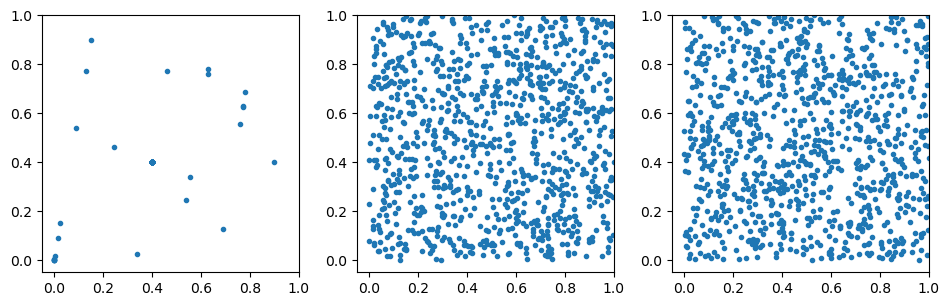

In [11]:
# Réponse
g = list(npr.randint(1000, size=6)) # une graine "aleatoire" de taille 6


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0, 1.5, 1.5])

x_GCLfloat=[]
for i in range(len(x_GCL)):
    x_GCLfloat.append(x_GCL[i]/2**24)

print(x_GCLfloat[:10])
print(x_GCL[:10])
#ax1.set_title('GCL')
ax1.set_xlim(-0.05, 1)
ax1.set_ylim(-0.05, 1)
ax1.set_aspect(aspect = 'equal')# graphique orthonormé : meme longueur pour x et y -> carre

x = x_GCLfloat[:1000]
y = x_GCLfloat[1:1001]
ax1.plot(x, y, '.')

#ax2.set_title('MRG32k3')
ax2.set_xlim(-0.05, 1)
ax2.set_ylim(-0.05, 1)
ax2.set_aspect(aspect = 'equal')
x = x_MRG32k3[:1000]
y = x_MRG32k3[1:1001]
ax2.plot(x, y, '.')
             
#ax3.set_title('Python')
ax3.set_xlim(-0.05, 1)
ax3.set_ylim(-0.05, 1)
ax3.set_aspect(aspect = 'equal')
x = x_Python[:1000]
y = x_Python[1:1001]
ax3.plot(x, y, '.')

plt.show()

Remarques : </br>
Le GLC de la question 4 a une tres faible couverture, les GPA est mauvais. </br>
MRG32k3 et numpy ont une bonne couverture, les GPA sont bons. </br>

> **Question 10 (test spectral des GCL) :**

> Considérons le GCL défini par :
- $S = \{1, 2, \dots, 100\}$
- $f(s) = as$ mod $101$
- $g(s) = \displaystyle\frac{s}{101}$

> En prenant respectivement les valeurs 51, 7 et 12 pour le paramètre $a$ du générateur, discuter sa qualité selon le critère précédent.

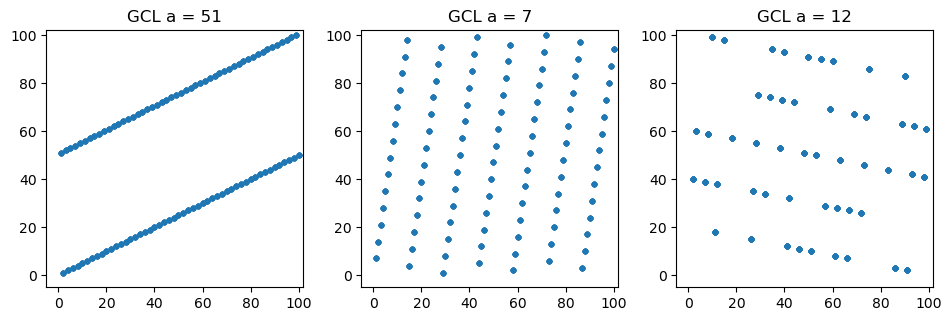

In [12]:
# Réponse
g = npr.randint(100)
x_GCL1 = monGCL_N(51,0,101,g,1001)
x_GCL2 = monGCL_N(7,0,101,g,1001)
x_GCL3 = monGCL_N(121,0,101,g,1001)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.tight_layout(rect = [0, 0, 1.5, 1.5])

ax1.set_title('GCL a = 51')
ax1.set_xlim(-5, 102)
ax1.set_ylim(-5, 102)
ax1.set_aspect(aspect = 'equal')
x = x_GCL1[:1000]
y = x_GCL1[1:1001]
ax1.plot(x, y, '.')

ax2.set_title('GCL a = 7')
ax2.set_xlim(-5, 102)
ax2.set_ylim(-5, 102)
ax2.set_aspect(aspect = 'equal')
x = x_GCL2[:1000]
y = x_GCL2[1:1001]
ax2.plot(x, y, '.')

ax3.set_title('GCL a = 12')
ax3.set_xlim(-5, 102)
ax3.set_ylim(-5, 102)
ax3.set_aspect(aspect = 'equal')
x = x_GCL3[:1000]
y = x_GCL3[1:1001]
ax3.plot(x, y, '.')
plt.show()

Remarques : </br>
le meilleeur GCL est pour a =7 avec la plus grande couverture. </br>
Le GCL pour a = 51 a une couverture tres faible. Aussi, tous les points sont tres proches les uns des autres. un test spectral en 3 dimensions aurait aussi une tres faible couverture </br>

## Attaque sur un GCL

Il s'agit maintenant de retrouver les paramètres d'un GCL (valeurs de $a$, $b$ et éventuellement $m$) à partir de la suite de nombres générée et de la connaissance, ou non de la valeur du modulo $m$. 

Soit $x_1, ..., x_N$ les entiers générés à partir de la graine $x_0$ et la relation de récurrence $x_n = ax_{n-1} + b$ [m].<br>
Posons $y_k = x_{k}-x_{k-1}$ pour $k\geq 1$.

### Cas 1 : $m$ connu

> **Question 11 :**

> Dans le cas où $y_1$ est inversible modulo $m$, montrer : $a = y_2y_1^{-1}$ [m] et $b = x_1 - ax_0$ [m]. Pour rappel, $y_1^{-1}$ désigne l'inverse modulaire de $y_1$, c'est à dire le nombre qui multiplié par $y_1$ donne $1$ modulo $m$

If $y_1$ is invertible modulo $m$, we can multiply both sides of the equation by $y_1^{-1}$ to get $a = y_2y_1^{-1}$ mod $m$.

For the second part, we know that $x_1 = ax_0 + b$ mod $m$. Rearranging this equation, we get $b = x_1 - ax_0$ mod $m$.

Réponse : 



**preuve de a :** </br>
$y_1=x_1-x_0$ et $y_2=x_2-x_1$ </br>
$x_2=ax_1+b$ [m]$ et $x_1=ax_0+b [m]$ </br>
$x_2-x_1=a(x_1-x_0)[m]=ay_1 [m]$ donc $y_2=ay_1 [m] \equiv a=y_2 y_1^{-1} [m]$

**preuve de b :** </br>
$x_1=ax_0+b [m] \equiv b=x_1-ax_0 [m]$

Propriétés : 

- $ a\mod m + b \mod m = (a+b) \mod m$
- $ a\mod m \times b \mod m = (a*b) \mod m$
- $a = b \mod c \equiv b = a \mod c$
- $aa^{-1} \mod m = 1 \mod m$

La fonction `inverseModulaire(mModulo, aNombre)` ci-dessous permet de calculer l'inverse modulaire d'un nombre en utilisant l'algorithme d'Euclide étendu. 
(source : https://github.com/MichaelCaraccio/Cryptographic-Algorithms/blob/master/Python/RSA_diffiehellman/euclide.py)

In [13]:
# Fonctions utiles
def inverseModulaire(mModulo, aNombre):
    """ Algorithme d'Euclide étendu pour trouver l'inverse modulaire 
        Inverse modulaire de a modulo m ---> a * a^-1 mod m = 1 """
    
    modulo = mModulo
    
    x = 0
    y = 1
    u = 1
    v = 0
    
    while aNombre != 0:
        q = mModulo // aNombre
        r = mModulo % aNombre
        
        m = x - u * q
        n = y - v * q
        
        mModulo = aNombre
        aNombre = r
        x = u
        y = v
        u = m
        v = n
        
    return x % modulo if mModulo == 1 else 0
    
    
def pgcd(a, b):
    """Sortie : pgcd de 2 entiers"""
    while b != 0: 
        a, b = b, a%b
    if a < 0:
        a = -a
    return a

def pgcdn(lst_n):
    """Sortie : pgcd de n (>=2) entiers"""
    p = pgcd(lst_n[0], lst_n[1])
    for x in lst_n[2:]:
        p = pgcd(p, x)
    return p


> **Question 12 :**
- En sachant que $m = 1023$, déterminer le GCL ayant généré les entiers 97, 188, 235, 293, 604, 596, 412. Pour cela, écrire une fonction `attaque_GCL_mConnu(x, m)` qui prend en entrée la suite $x$ des valeurs générées par le GCL, et $m$ le modulo connu et donne en sortie les valeurs de $a$ et $b$.
- Vérifier le résultat à l'aide de **monGCL_N**$(a, b, m, g, N)$ de la question 5

In [14]:
# Réponse
def attaque_GCL_mConnu(x, m):   
    """ Entrée : liste x de la suite des valeurs générées par le GCL,
        et m le modulo connu
        Sorties : a et b les coefficients de la fonction (affine) de transition
    """
    yks=[]
    for i in range(1,len(x)):
        yks.append(x[i]-x[i-1])
    
    a=yks[1]*inverseModulaire(m,yks[0])
    b=(x[1]-a*x[0])%m
    

    return a,b

#Application à faire

x=[97, 188, 235, 293, 604, 596, 412]
m=1023
try:
    a,b=attaque_GCL_mConnu(x,m)
    assert x == monGCL_N(a,b,m,97,6)
    print("attaque_GCL_mConnu : OK")
except:
    print("attaque_GCL_mConnu : ERREUR")

attaque_GCL_mConnu : OK


### Cas 2 : $m$ inconnu

> **Question 13 :**
- Montrer $y_{k+1} = ay_k$ [m].
- Posons $z_k = y_{k+1}y_{k-1}-y_k^2$, déduire de la question précédente que $z_k = 0$ [m]

Réponse : 
- montrez que $y_{k+1} = ay_k [m]$. </br>

Tous les $z_k$ sont donc des multiples de $m$, autrement dit $m$ est un diviseur commun de tous les $z_k$ et "très probablement" le PGCD de tous les $z_k$

> **Question 14 :**
- A l'aide de la remarque précédente, déterminer le GCL ayant généré les entiers suivants :
> <center> 234, 1227, 12158, 2475, 26787, 30101, 12498, 18328, 76, 11400 </center>
Pour cela, écrire une méthode `attaque_GCL_mInconnu(x)` qui donne en sortie, les coefficients $a$, $b$ et le modulo $m$ à partir de la séquence $x$ des entiers générés. 
- Combien d'entiers suffisent pour déterminer ce GCL ?

In [30]:
# Réponse


def attaque_GCL_mInconnu(x):  
    """ Entrée : liste x de la suite des valeurs générées par le GCL
        Sorties : a et b les coefficients de la fonction (affine) de transition et m le modulo
        (et nbEntiers : le nombre d'entiers minimum dont on a eu besoin)
    """

    yks=[]
    for i in range(1,len(x)):
        yks.append(x[i]-x[i-1])

    zks=[]
    for i in range(1,len(yks)-1):
        zks.append(yks[i+1]*yks[i-1]-yks[i]**2)

    m=pgcdn(zks)
    a,b=attaque_GCL_mConnu(x,m)
  
    return a,b,m
     
    
    
    

#Application à faire

x=[97, 188, 235, 293, 604, 596, 412]
try:
    a,b,m=attaque_GCL_mInconnu(x)
    print(a,b,m)
    print(monGCL_N(a,b,m,97,6))
    assert x == monGCL_N(a,b,m,97,6)
    print("attaque_GCL_mInconnu : OK\n")
except:
    print("attaque_GCL_mInconnu : ERREUR\n")

x = [234, 1227, 12158, 2475, 26787, 30101, 12498, 18328, 76, 11400 ]
try :
    a,b,m = attaque_GCL_mInconnu(x)
    print(monGCL_N(a,b,m,234,len(x)-1))
    assert x == monGCL_N(a,b,m,234,len(x)-1)
    print("attaque_GCL_mInconnu : OK\n")
except:
    print("attaque_GCL_mInconnu : ERREUR\n")

x = [476701654, 1778738775, 130368836, 1085367853, 209217378, 1452282099, 123, 234, 345, 456, 567]
try :
    a,b,m = attaque_GCL_mInconnu(x)
    print(monGCL_N(a,b,m,x[0],len(x)-1))
    assert x == monGCL_N(1,111,m,x[0],len(x)-1)
    print("attaque_GCL_mInconnu : OK\n")
except:
    print("attaque_GCL_mInconnu : ERREUR\n")

x = [476701654, 1778738775, 130368836, 1085367853, 209217378, 1452282099, 259223984, 1592473641, 1845073838, 1578158415]
try :
    a,b,m = attaque_GCL_mInconnu(x)
    print(monGCL_N(a,b,m,x[0],len(x)-1))
    assert x == monGCL_N(a,b,m,x[0],len(x)-1)
    print("attaque_GCL_mInconnu : OK\n")
except:
    print("attaque_GCL_mInconnu : ERREUR\n")

32759 3 1023
[97, 188, 235, 293, 604, 596, 412]
attaque_GCL_mInconnu : OK

[234, 1227, 12158, 2475, 26787, 30101, 12498, 18328, 76, 11400]
attaque_GCL_mInconnu : OK

[476701654, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attaque_GCL_mInconnu : ERREUR

[476701654, 1778738775, 130368836, 1085367853, 209217378, 1452282099, 259223984, 1592473641, 1845073838, 1578158415]
attaque_GCL_mInconnu : OK



Le nombre minimum d'entiers nécessaires pour déterminer les parametres d'un GCL semble varier en fonction de son module et de son a. </br>
On peut voir dans la 2e serie de x que l'ecart entre les valeurs est constant (a=1 et b=111), cependant, l'algorithme ne peut pas determiner m. </br>

<div style="text-align: right">Maxime Soulie</div>'
